In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/ipl_matches.csv")
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


Data Cleaning

In [6]:
df.columns.to_list()

['id',
 'Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [7]:
df.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [8]:
df[['League', 'Year']] = df['Season'].str.split('-', expand=True)
df['Year'] = df['Year'].astype(int)

In [9]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,League,Year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,IPL,2017
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,IPL,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,IPL,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,IPL,2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,IPL,2017


In [10]:
df.shape

(756, 20)

In [11]:
df = df.drop(["dl_applied","umpire3","League","Season"],axis = 1)

In [12]:
List = ["city", "winner", "player_of_match", "umpire1", "umpire2"]
for i in List :
  df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.isnull().sum()

,0
id,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
winner,0
win_by_runs,0


In [14]:
df.duplicated().sum()


np.int64(0)

Final Output

In [15]:
df.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Year
0,1,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,3,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,4,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
4,5,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,2017


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

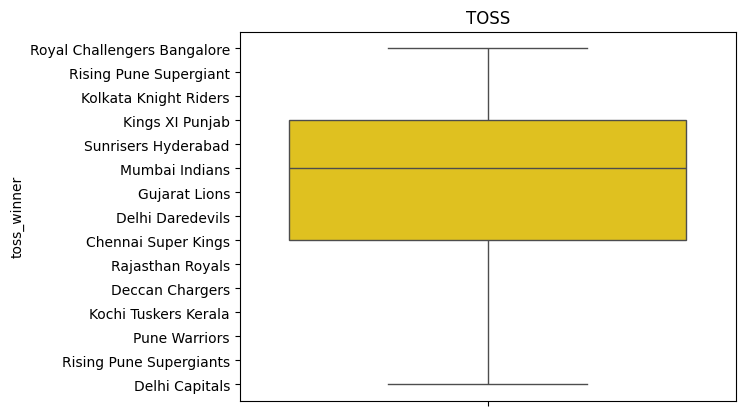

In [17]:
sns.boxplot(y="toss_winner",data = df ,color="gold")
plt.title("TOSS")
plt.show()

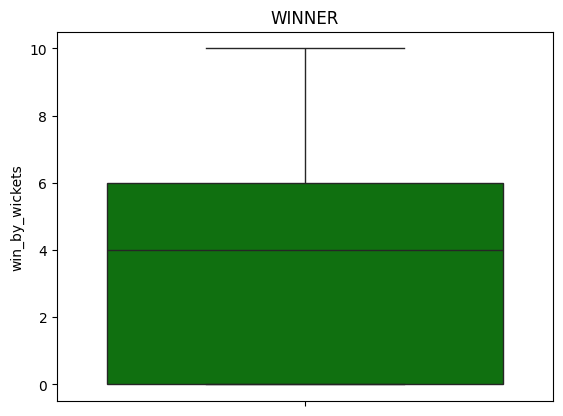

In [18]:
sns.boxplot(y="win_by_wickets",data = df ,color="Green")
plt.title("WINNER")
plt.show()

EDA

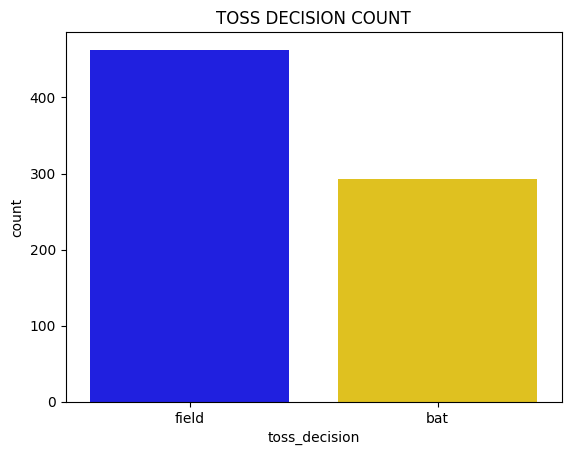

In [19]:
sns.countplot( x = "toss_decision",data = df , hue="toss_decision",palette=["blue","gold"])
plt.title("TOSS DECISION COUNT")
plt.show()

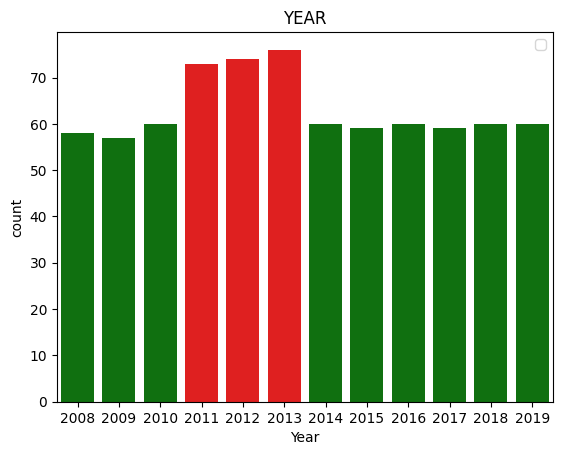

In [20]:
color =["Green","Green","Green","red","red","red","Green","Green","Green","Green","Green","Green"]
sns.countplot( x = "Year", data = df, hue = "Year",palette = color)
plt.title("YEAR")
plt.legend([])
plt.show()

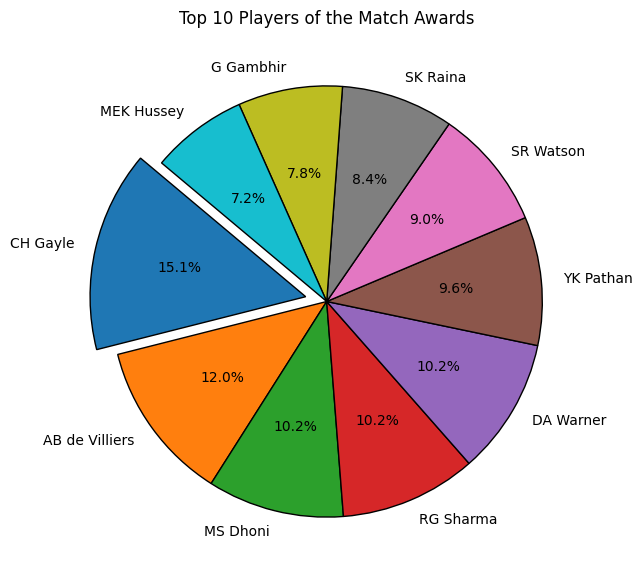

In [21]:
top_players = df["player_of_match"].value_counts().nlargest(10)
explode = [0.1 if i == 0 else 0 for i in range(len(top_players))]
plt.figure(figsize=(7,7))
plt.pie(top_players ,labels=top_players.index , autopct="%1.1f%%" , startangle=140 , explode=explode , colors=plt.cm.tab10.colors , wedgeprops={"edgecolor":"black"})
plt.title("Top 10 Players of the Match Awards")
plt.show()

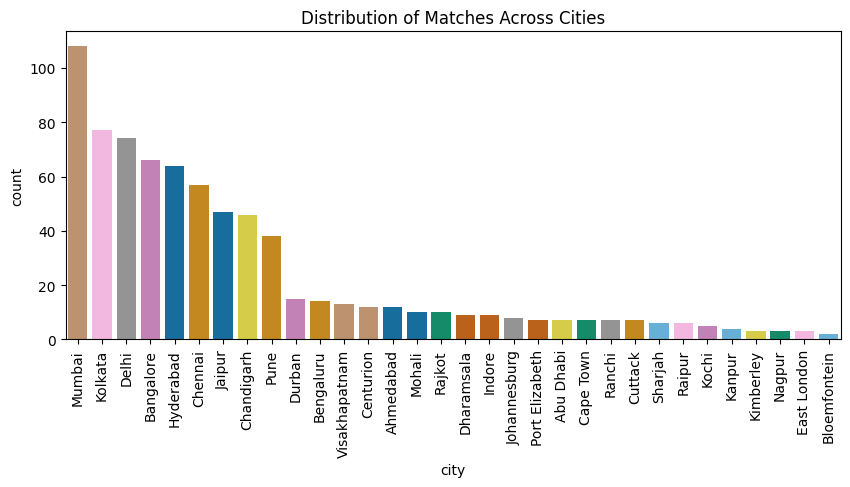

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(x="city", data=df, order=df["city"].value_counts().index, palette="colorblind", hue="city", legend=False)
plt.xticks(rotation=90)
plt.title("Distribution of Matches Across Cities")
plt.show()

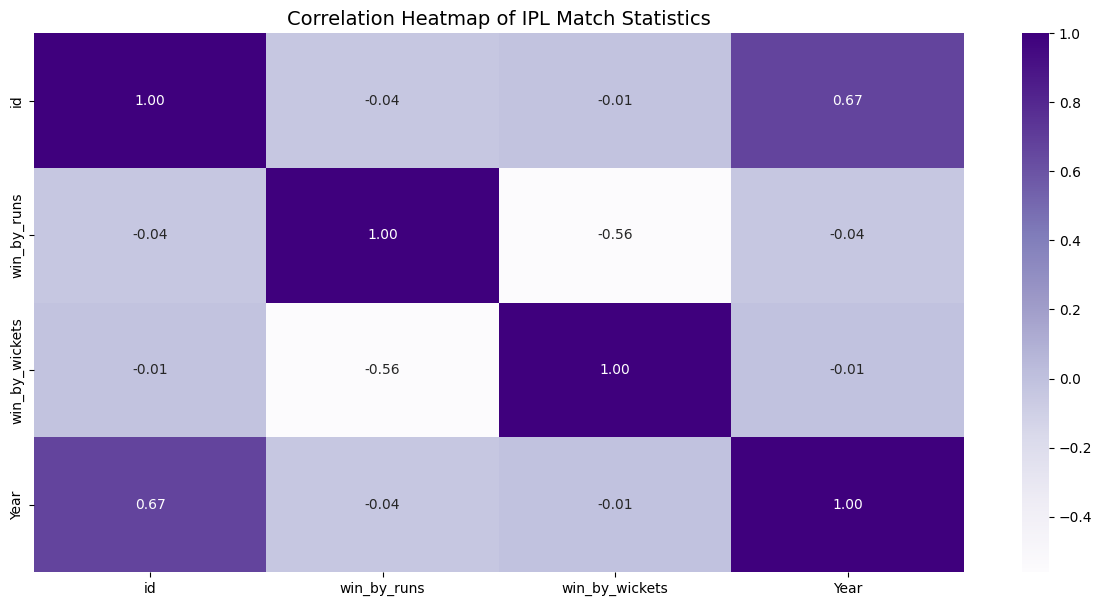

In [23]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(15,7))
sns.heatmap(numeric.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.title("Correlation Heatmap of IPL Match Statistics", fontsize=14)
plt.show()

Data Process

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X = df.drop(columns=['winner', 'id', 'date','umpire1','umpire2','player_of_match'])
y = df['player_of_match']

# Encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [38]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [28]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [29]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

Model Traning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [31]:
LOGIC = LogisticRegression()

LOGIC.fit(X_train_scaled, y_train)

y_pred = LOGIC.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.013157894736842105

Classification Report:
                    precision    recall  f1-score   support

         A Mishra       0.00      0.00      0.00         3
          A Nehra       0.00      0.00      0.00         0
          A Zampa       0.00      0.00      0.00         1
         AB Dinda       0.00      0.00      0.00         1
   AB de Villiers       0.00      0.00      0.00         5
     AC Gilchrist       0.00      0.00      0.00         2
         AC Voges       0.00      0.00      0.00         1
       AD Mathews       0.00      0.00      0.00         1
       AD Russell       0.00      0.00      0.00         3
         AJ Finch       0.00      0.00      0.00         3
        AM Rahane       0.00      0.00      0.00         2
         AR Patel       0.00      0.00      0.00         3
         AS Yadav       0.00      0.00      0.00         1
        AT Rayudu       0.00      0.00      0.00         1
          B Kumar       0.00      0.00      0.00         1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.02631578947368421

Classification Report:
                    precision    recall  f1-score   support

         A Kumble       0.00      0.00      0.00         0
         A Mishra       0.00      0.00      0.00         3
          A Nehra       0.00      0.00      0.00         0
          A Singh       0.00      0.00      0.00         0
          A Zampa       0.00      0.00      0.00         1
  AA Jhunjhunwala       0.00      0.00      0.00         0
         AB Dinda       0.50      1.00      0.67         1
   AB de Villiers       0.00      0.00      0.00         5
     AC Gilchrist       0.00      0.00      0.00         2
         AC Voges       0.00      0.00      0.00         1
   AD Mascarenhas       0.00      0.00      0.00         0
       AD Mathews       0.00      0.00      0.00         1
       AD Russell       0.00      0.00      0.00         3
         AJ Finch       0.00      0.00      0.00         3
           AJ Tye       0.00      0.00      0.00         0


In [33]:
TREE = DecisionTreeClassifier()

TREE.fit(X_train_scaled, y_train)

y_pred = TREE.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.05921052631578947

Classification Report:
                    precision    recall  f1-score   support

         A Mishra       0.00      0.00      0.00         3
          A Nehra       0.00      0.00      0.00         0
          A Zampa       0.00      0.00      0.00         1
  AA Jhunjhunwala       0.00      0.00      0.00         0
         AB Dinda       0.00      0.00      0.00         1
   AB de Villiers       0.00      0.00      0.00         5
     AC Gilchrist       0.33      0.50      0.40         2
         AC Voges       0.00      0.00      0.00         1
       AD Mathews       0.00      0.00      0.00         1
       AD Russell       0.00      0.00      0.00         3
         AJ Finch       0.00      0.00      0.00         3
           AJ Tye       0.00      0.00      0.00         0
        AM Rahane       0.00      0.00      0.00         2
         AR Patel       0.00      0.00      0.00         3
         AS Yadav       0.00      0.00      0.00         1


In [43]:
XG = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))
XG.fit(X_train_scaled, y_train_encoded, eval_set=[(X_test_scaled, y_test_encoded)], verbose=False)
y_pred = XG.predict(X_test_scaled)

# Decode predictions for classification report
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded, zero_division=0))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199], got [  0   1   2   3   4   5   6   8   9  10  11  13  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  32  33  34  35  36  37  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  75  77  78  79  81
  82  83  84  85  86  87  88  89  90  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 109 110 111 112 113 114 115 117 118 119 120
 121 122 123 124 125 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159 160
 161 162 163 164 166 167 168 170 171 172 173 175 176 177 178 179 180 181
 183 184 186 187 188 189 190 191 192 193 194 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 211 213 214 215 216 217 218 219 220 222 223
 224 225]